[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Confusion Matrix:
[[105  12]
 [ 62  71]]
Accuracy: 70.40%


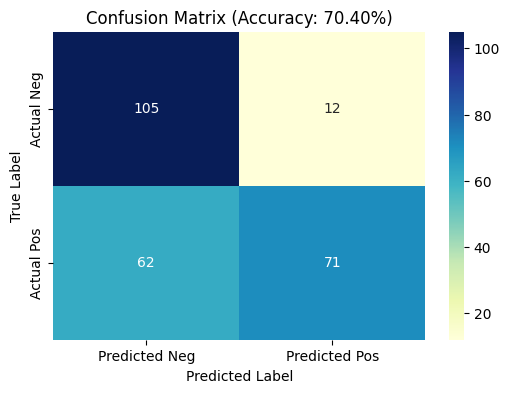

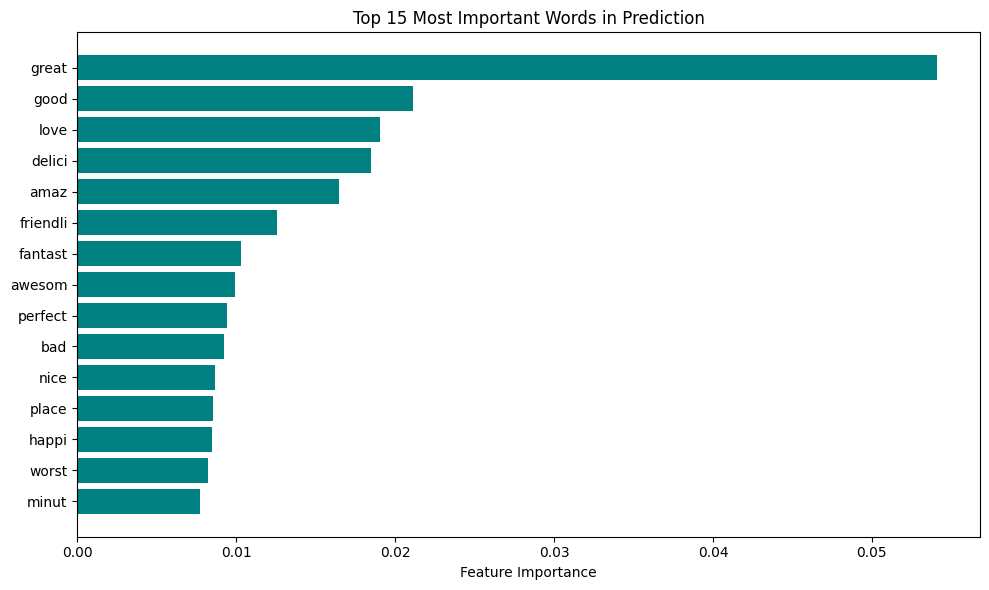

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

nltk.download('stopwords')

dataset = pd.read_csv('Restaurant_Reviews.tsv', delimiter='\t', quoting=3)  # quoting=3 to ignore quotes; adjust if needed
# The dataset has columns: "Review" and "Liked" (or similar) where 0 = negative, 1 = positive.

corpus = []
ps = PorterStemmer()
all_stopwords = set(stopwords.words('english'))

for i in range(len(dataset)):
    # Clean non-letters
    review = re.sub('[^a-zA-Z]', ' ', dataset['Review'][i])
    review = review.lower()
    review = review.split()
    # Remove stop-words, then stem
    review = [ps.stem(word) for word in review if word not in all_stopwords]
    review = ' '.join(review)
    corpus.append(review)

# Create Bag of Words (feature extraction)
cv = CountVectorizer(max_features=1500)  # you can tweak max_features
X = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:, 1].values  # assuming second column is label (0/1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

classifier = RandomForestClassifier(n_estimators = 501, criterion='entropy', random_state=0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

print("Confusion Matrix:")
print(cm)
print(f"Accuracy: {acc*100:.2f}%")

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=['Predicted Neg','Predicted Pos'],
            yticklabels=['Actual Neg','Actual Pos'])
plt.title(f'Confusion Matrix (Accuracy: {acc*100:.2f}%)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

importances = classifier.feature_importances_
indices = np.argsort(importances)[-15:]  # Top 15 important words

plt.figure(figsize=(10,6))
plt.barh(range(len(indices)), importances[indices], color='teal')
plt.yticks(range(len(indices)), [cv.get_feature_names_out()[i] for i in indices])
plt.xlabel('Feature Importance')
plt.title('Top 15 Most Important Words in Prediction')
plt.tight_layout()
plt.show()